# Brownian Motion Simulation and Martingale Property

This notebook demonstrates the simulation of Brownian motion and verifies its martingale property through two functions: `martingaleA()` and `martingaleB()`. All formulas below are written in LaTeX.

---

## 1. Function: `martingaleA()`

### Theory

A standard Brownian motion \( W(t) \) satisfies the following properties:

1. **Initial Condition:**
   $$
   W(0) = 0.
   $$

2. **Distribution at Time \( t \):**
   $$
   W(t) \sim \mathcal{N}(0, t),
   $$
   meaning that \( W(t) \) is normally distributed with mean \( 0 \) and variance \( t \).

3. **Martingale Property:**
   $$
   \mathbb{E}[W(t)] = 0.
   $$

### Simulation in `martingaleA()`

To simulate \( W(t) \), we use:
$$
W(t) = \sqrt{t} \cdot Z, \quad \text{with } Z \sim \mathcal{N}(0,1).
$$
The function computes the sample mean of the simulated \( W(t) \) values and compares it with thW(s).
   $$
   If the martingale property holds, this error should be close to zero.

### Visualization

- The function plots a sample path of \( W(t) \) from \( 0 \) to \( s \).
- It also displays the nested simulxpectation and \( W(s) \).

This concludes the explanation of the simulation theory and the corresponding LaTeX formulas.
and \( W(s) \) is minimal.

This concludes the explanation of the simulation theory and the corresponding LaTeX formulas.
and \( W(s) \) is minimal.

This concludes the explanation of the simulation theory and the corresponding LaTeX formulas.
e simulations help to illustrate the fundamental properties of Brownian motion and the concept of martingales.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

t=10
s=1
NoOfPaths=100
NoOfSteps=100

In [2]:
def martingaleA():
    W_t=np.random.normal(0.0,pow(t,0.5),[NoOfPaths,1])
    E_W_t=np.mean(W_t)
    print("mean value equals to: %.2f while the expected value is W(0) =%0.2f " %(E_W_t,0.0))
    # nexted martingle 

## 2. Function: `martingaleB()`

### Theory

For a Brownian motion \( W(t) \), the **conditional martingale property** is given by:
$$
\mathbb{E}[W(t) \mid \mathcal{F}_s] = W(s),
$$
for any \( 0 \leq s \leq t \), where \( \mathcal{F}_s \) represents the information available up to time \( s \).

### Simulation Approach

1. **Simulating \( W(s) \) for \( 0 \leq t \leq s \):**

   - **Time Step for \( s \):**
     $$
     \Delta t_1 = \frac{s}{\text{NoOfSteps}}.
     $$

   - **Incremental Simulation:**
     $$
     W(s + \Delta t_1) = W(s) + \sqrt{\Delta t_1} \cdot Z, \quad Z \sim \mathcal{N}(0,1).
     $$

   Multiple paths are simulated to generate different realizations of \( W(s) \).

2. **Nested Simulation from \( s \) to \( t \):**

   For each simulated \( W(s) \), a sub-simulation is performed from \( s \) to \( t \):

   - **Time Step for \( t \):**
     $$
     \Delta t_2 = \frac{t - s}{\text{NoOfSteps}}.
     $$

   - **Incremental Simulation:**
     $$
     W(t + \Delta t_2) = W(t) + \sqrt{\Delta t_2} \cdot Z, \quad Z \sim \mathcal{N}(0,1).
     $$

   For each sub-path, the terminal value \( W(t) \) is obtained. The conditional expectation is approximated by:
   $$
   \mathbb{E}[W(t) \mid W(s)] \approx \frac{1}{\text{NoOfPaths}} \sum_{i=1}^{\text{NoOfPaths}} W_t^{(i)}.
   $$
   
   The error is then computed as:
   $$
   \text{Error} = \mathbb{E}[W(t) \mid W(s)] - W(s).
   $$
   If the martingale property holds, this error should be close to zero.


In [3]:
def martingaleB():
    
    Z=np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W=np.zeros([NoOfPaths,NoOfSteps+1])
    
    # time stemp from [t0,s]
    
    dt1=s/float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # normil;isation
        Z[:,i]=(Z[:,i]-np.mean(Z[:,i]))/np.std(Z[:,i])
        W[:,i+1]=W[:,i]+ pow(dt1,0.5)*Z[:,i]
        # last column of W
    W_s =W[:,-1]
    #print("W S is this -",W_s)
    
    # for evwry path we create asub simulation until time t and caluculation
    # time step form [s,t]
    
    dt2=(t-s)/float(NoOfSteps)
    W_t=np.zeros([NoOfPaths,NoOfSteps+1]);
    # to store the result
    E_W_t = np.zeros([NoOfPaths])
    Error=[]
    for i in range(0,NoOfSteps):
        
        
        
        
        
       # Sub-simulation from time "s" until "t"
        W_t[:,0]=W_s[i];
        for j in range(0,NoOfSteps):
            
            Z[:,j] = (Z[:,j]-np.mean(Z[:,j])) / np.std(Z[:,j]);
            #path simulation, from "s" until "t"
            W_t[:,j+1] = W_t[:,j] + pow(dt2,0.5)*Z[:,j];   
        E_W_t[i]=np.mean(W_t[:,-1])
        Error.append(E_W_t[i]-W_s[i])
    
        if i == 0:
            
            plt.figure(figsize=(10, 5))
            plt.plot(np.linspace(0, s, NoOfSteps+1), W[0, :], label="W(t) from 0 to s")
            for j in range(0, NoOfPaths):  
                plt.plot(np.linspace(s, t, NoOfSteps+1), W_t[j, :], alpha=0.3)
            plt.title("Nested Brownian Motion Simulation")
            plt.xlabel("Time")
            plt.ylabel("W(t)")
            plt.legend()
            plt.grid()
            plt.show()
    print(Error)
    error = np.max(np.abs(E_W_t-W_s))
    print("The error is equal to: %.18f"%(error))  


In [4]:
martingaleA()      

mean value equals to: 0.44 while the expected value is W(0) =0.00 


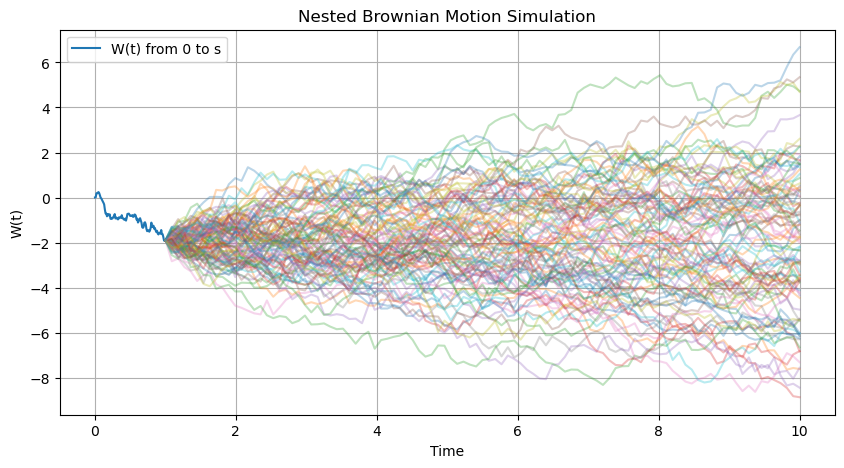

[2.220446049250313e-16, 0.0, 0.0, 1.6653345369377348e-16, -1.1102230246251565e-16, 0.0, 6.661338147750939e-16, 0.0, -2.220446049250313e-16, 5.551115123125783e-17, 7.28583859910259e-17, 1.1102230246251565e-16, 0.0, 2.220446049250313e-16, 2.7755575615628914e-17, 0.0, 0.0, 1.1102230246251565e-16, 0.0, 0.0, 2.220446049250313e-16, 0.0, 1.1102230246251565e-16, 0.0, 5.551115123125783e-17, 2.220446049250313e-16, 0.0, 0.0, 1.1102230246251565e-16, -1.1102230246251565e-16, -1.1102230246251565e-16, 2.220446049250313e-16, 0.0, 2.7755575615628914e-16, 0.0, -4.85722573273506e-17, 0.0, 0.0, 5.551115123125783e-17, 0.0, 1.1102230246251565e-16, -5.551115123125783e-17, 0.0, -4.440892098500626e-16, 0.0, 0.0, 0.0, 0.0, -1.1102230246251565e-16, 0.0, 2.220446049250313e-16, 1.6653345369377348e-16, 0.0, 0.0, 0.0, -5.551115123125783e-17, 2.220446049250313e-16, 1.1102230246251565e-16, 0.0, 2.220446049250313e-16, 1.1102230246251565e-16, 2.220446049250313e-16, 2.220446049250313e-16, -1.1102230246251565e-16, 1.11022

In [5]:
martingaleB()      
           

## Summary of Key Formulas

1. **Brownian Motion Increment:**
   $$
   W(t + \Delta t) = W(t) + \sqrt{\Delta t} \cdot Z, \quad Z \sim \mathcal{N}(0,1).
   $$

2. **Direct Simulation of \( W(t) \):**
   $$
   W(t) = \sqrt{t} \cdot Z, \quad Z \sim \mathcal{N}(0,1).
   $$

3. **Martingale Conditional Expectation:**
   $$
   \mathbb{E}[W(t) \mid \mathcal{F}_s] = W(s).
   $$

---

## Conclusion

- The function **`martingaleA()`** verifies that the mean of \( W(t) \) is approximately \( 0 \) for a fixed \( t \), consistent with \( W(t) \sim \mathcal{N}(0, t) \).
- The function **`martingaleB()`** demonstrates the conditional martingale property by showing that:
  $$
  \mathbb{E}[W(t) \mid W(s)] \approx W(s),
  $$
  with minimal error between the simulated conditional expectation and \( W(s) \).
